# Stock Analysis Capstone Project  

-----

**Complete the tasks in bold below**

**TASK: Run the cells below to import the relevant libraries and load the related .csv files.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

**Portfolio of Bank Stocks**

In [2]:
# Bank of America
BAC = yf.download("BAC",start='2016-09-06',end='2021-09-04')

# JP Morgan
JPM = yf.download("JPM",start='2016-09-06',end='2021-09-04')

# CITIGroup
CITI = yf.download("C",start='2016-09-06',end='2021-09-04')

# HSBC
HSBC = yf.download("HSBC",start='2016-09-06',end='2021-09-04')

# Royal Bank of Canada
RY = yf.download("RY",start='2016-09-06',end='2021-09-04')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,16.049999,16.059999,15.700000,15.780000,13.281258,96542200
2016-09-07,15.720000,15.850000,15.650000,15.700000,13.213923,63310300
2016-09-08,15.770000,15.940000,15.680000,15.860000,13.348588,69292700
2016-09-09,15.910000,16.150000,15.740000,15.740000,13.247592,135182500
2016-09-12,15.650000,15.940000,15.480000,15.900000,13.382257,109724000
...,...,...,...,...,...,...
2021-08-30,42.630001,42.630001,41.630001,41.660000,38.585114,44855600
2021-08-31,41.669998,42.070000,41.360001,41.750000,38.668465,54654600
2021-09-01,41.750000,41.779999,41.029999,41.189999,38.149796,52361900


#### List and Dictionary for Convenience

In [3]:
portfolio_list = [BAC,JPM,CITI,HSBC,RY]

In [4]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'CITI':CITI,'HSBC':HSBC,'RY':RY}

-----------------------

### Part One: Returns Analysis
-----------

**TASK: What is the start date and what is the end date for the price history of these stocks? (Note: They all share the same timespan, you just need to figure it out for one stock holding.)**

In [5]:
#CODE HERE
BAC.index[0], BAC.index[-1]

(Timestamp('2016-09-06 00:00:00'), Timestamp('2021-09-03 00:00:00'))

**TASK: Create a line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio (together on the same plot). Make sure the plot has a legend. [Hint to get them all on the same figure (but there are many ways to do this)](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)**

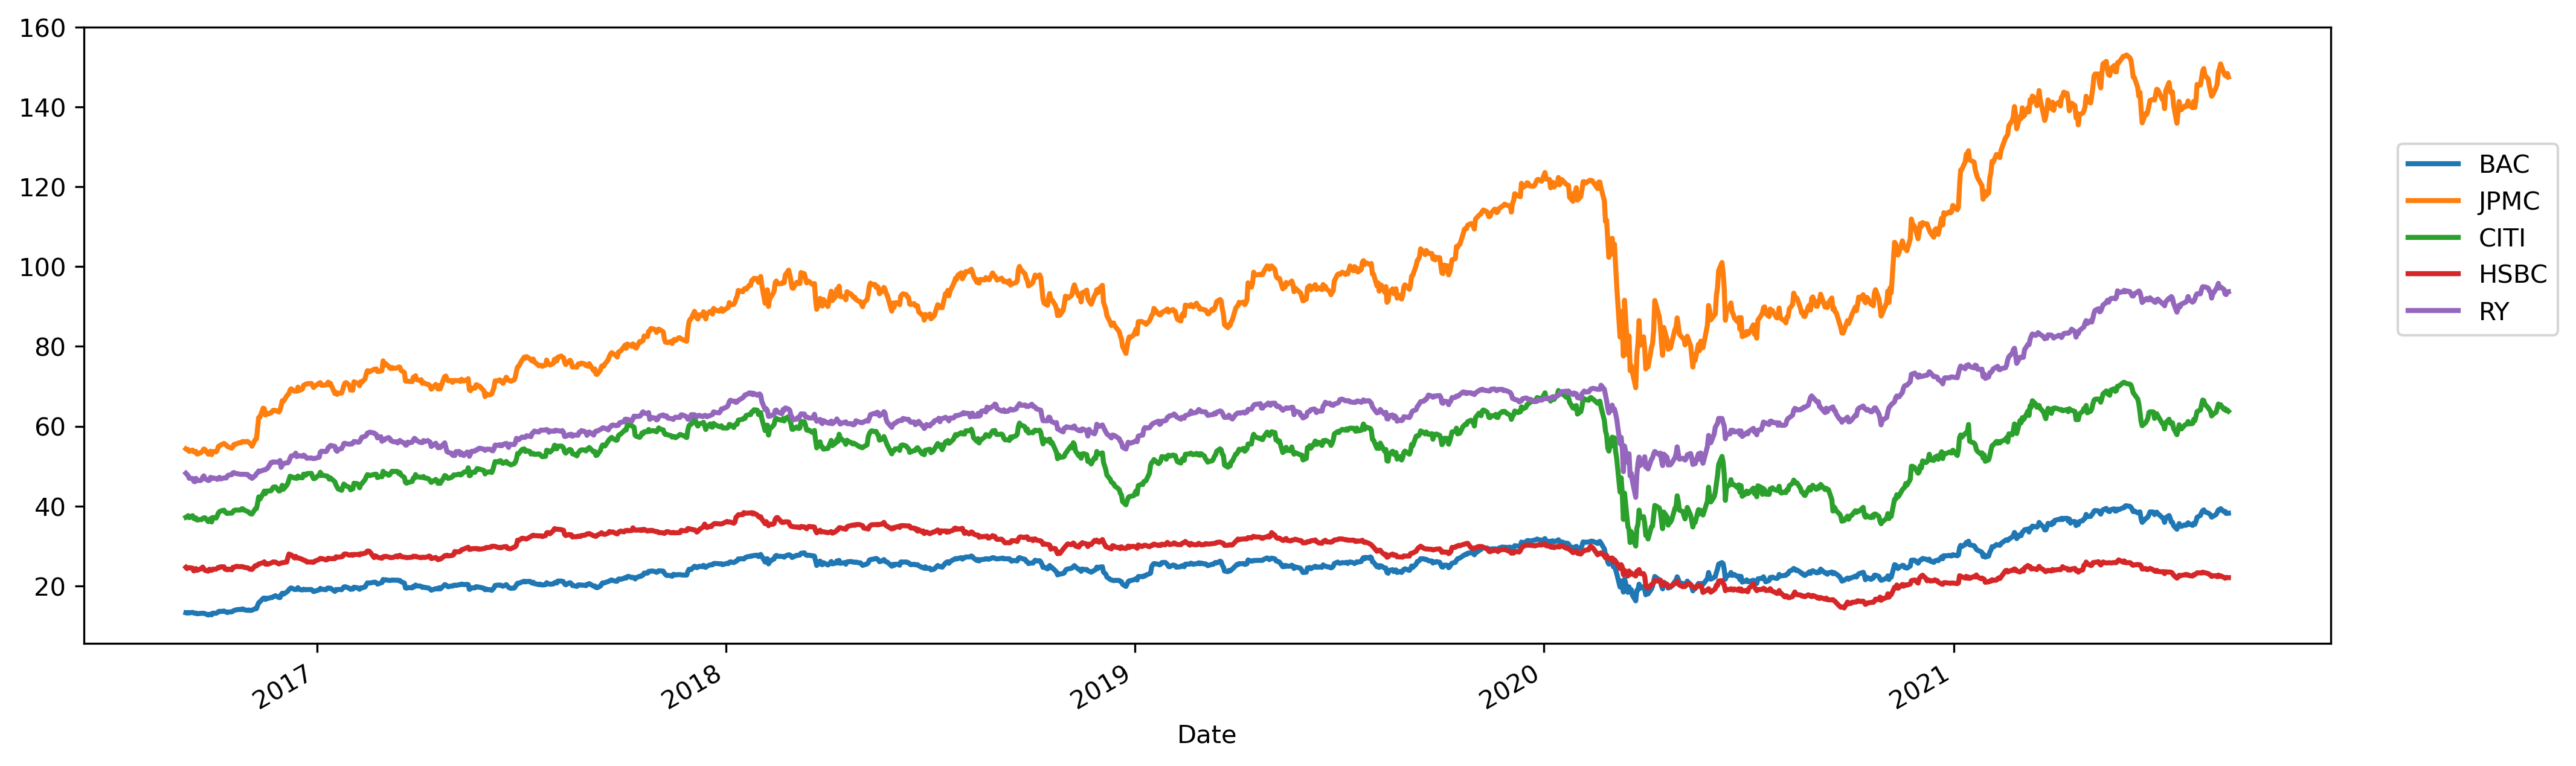

In [6]:
#CODE HERE
plt.figure(dpi=300, figsize=(16,5))
BAC['Adj Close'].plot(label='BAC',lw=2)
JPM['Adj Close'].plot(label='JPMC',lw=2)
CITI['Adj Close'].plot(label='CITI',lw=2)
HSBC['Adj Close'].plot(label='HSBC',lw=2)
RY['Adj Close'].plot(label='RY',lw=2)
plt.legend(loc=(1.03,0.5))

**TASK: Create a function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates. For example, you should be able to pass in perc_calc(BAC,'2016-09-06','2021-09-03') and get back "Percent Change: 187.7%".**

You can actually do this in one line, but don't feel like you *have* to. You should also note, that you don't need to worry about checking someone's date, you can assume the dates provided are in the dataset (e.g. user won't pass in 2020-12-25). Feel free to add in a datetime check if you want.

In [7]:
def perc_calc(ticker,start_date,end_date):

    diff = ticker['Adj Close'][end_date] - ticker['Adj Close'][start_date]
    perc_change = round(100*diff/ticker['Adj Close'][start_date],2)

    return (f'Percent Change: {perc_change}%')

In [8]:
perc_calc(BAC,'2016-09-06','2021-09-03')

'Percent Change: 187.74%'

**TASK: Create a histogram of the daily returns for each stock in the portfolio:**

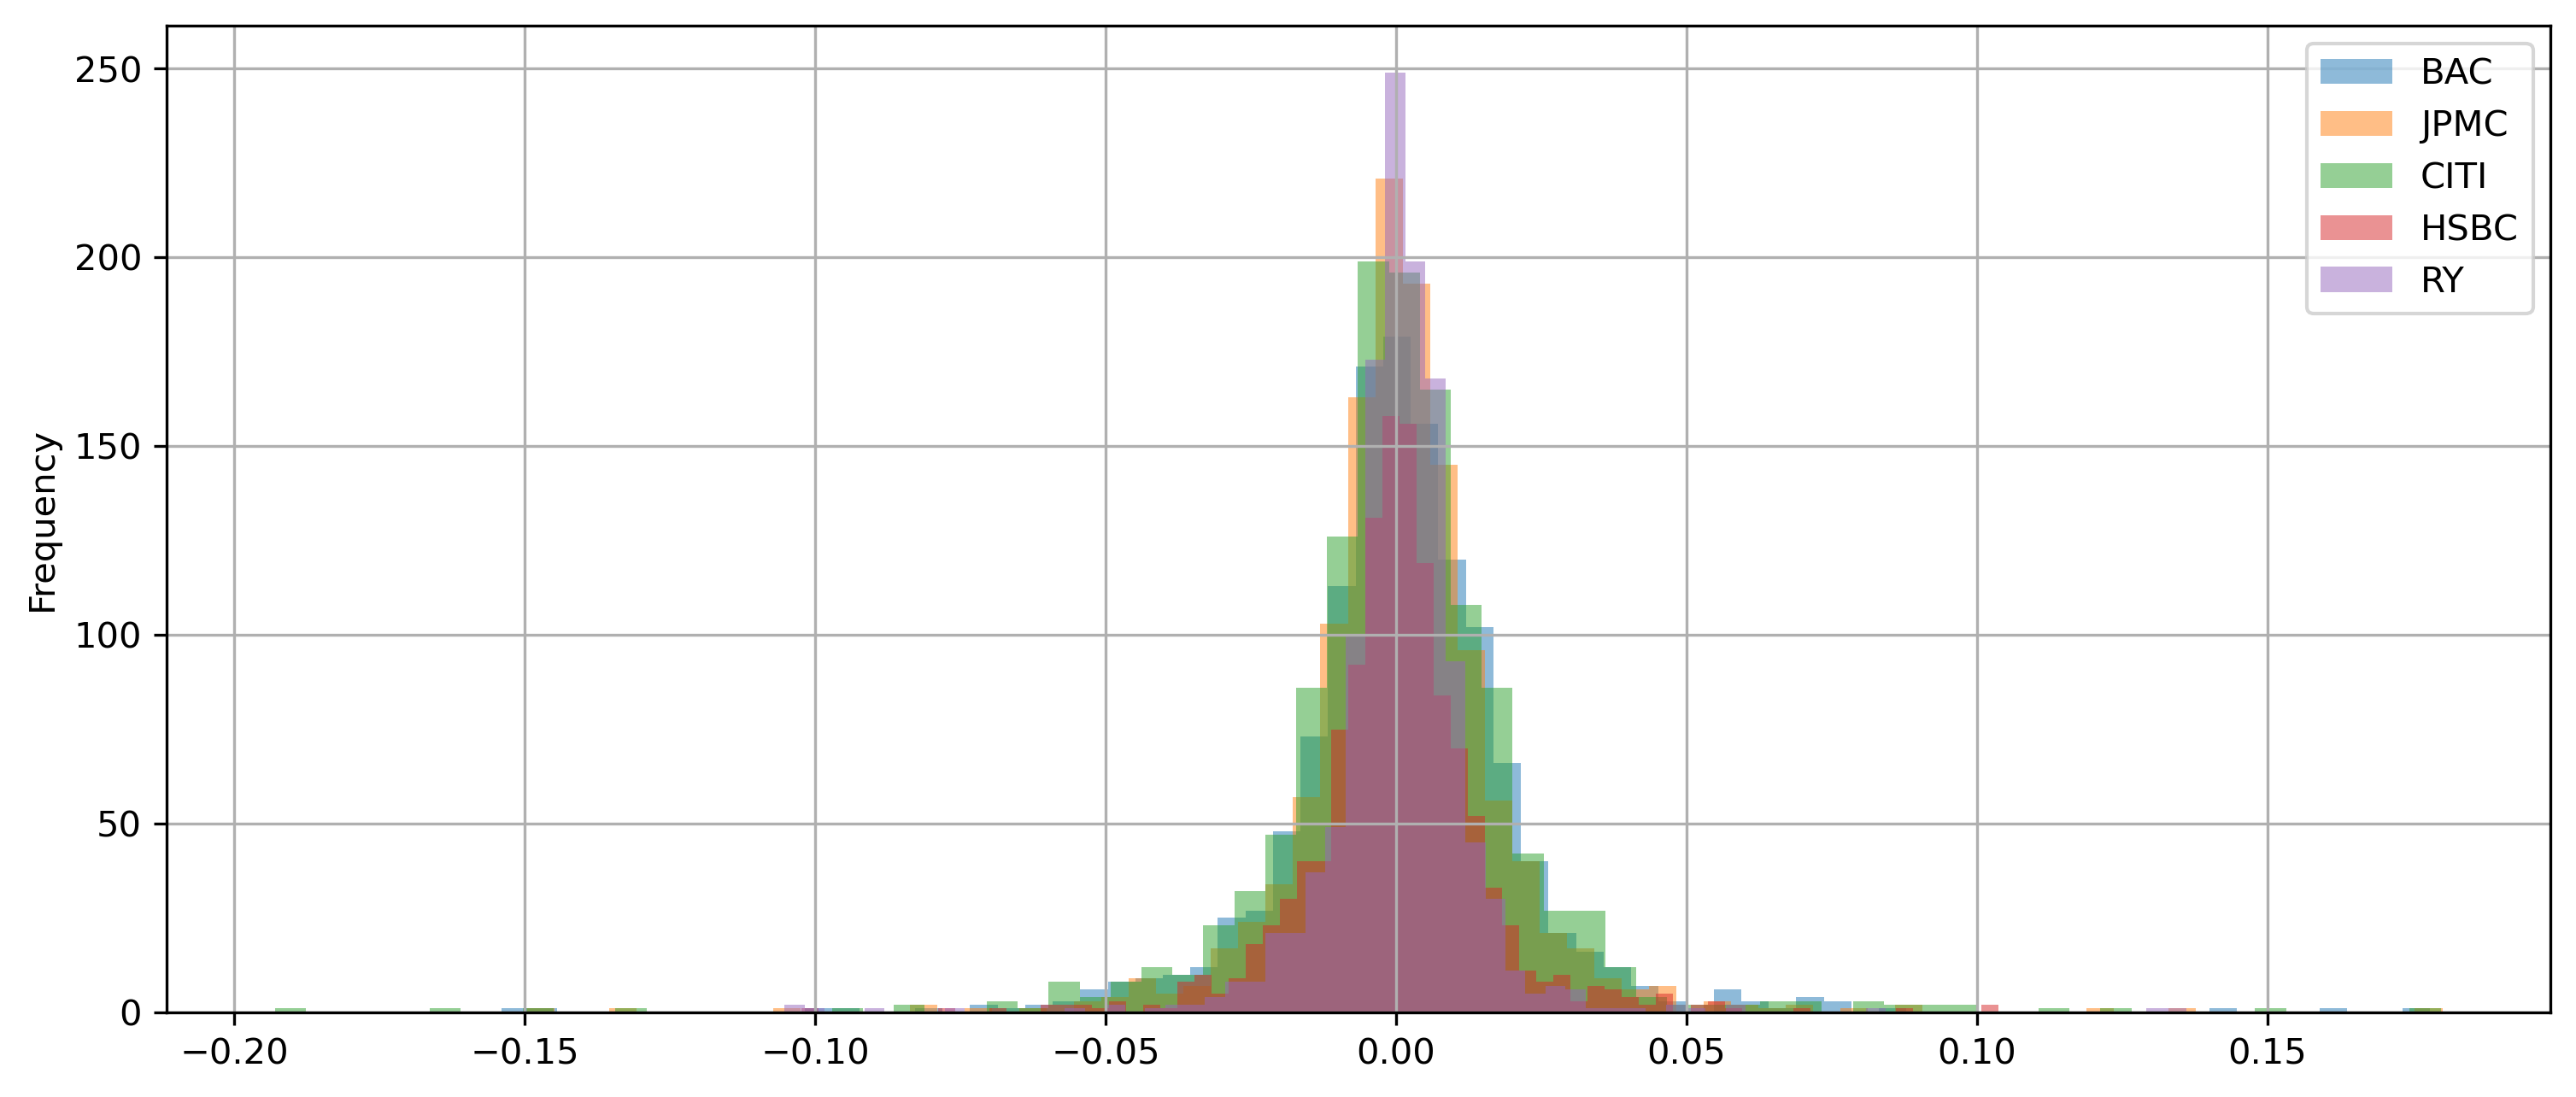

In [9]:
#CODE HERE
BAC["Daily Returns"] = BAC['Adj Close'].pct_change(1)
JPM["Daily Returns"] = JPM['Adj Close'].pct_change(1)
CITI["Daily Returns"] = CITI['Adj Close'].pct_change(1)
HSBC["Daily Returns"] = HSBC['Adj Close'].pct_change(1)
RY["Daily Returns"] = RY['Adj Close'].pct_change(1)

plt.figure(dpi=300, figsize=(12,5))
BAC['Daily Returns'].plot(kind='hist',label='BAC',alpha=0.5,bins=70)
JPM['Daily Returns'].plot(kind='hist',label='JPMC',alpha=0.5,bins=70)
CITI['Daily Returns'].plot(kind='hist',label='CITI',alpha=0.5,bins=70)
HSBC['Daily Returns'].plot(kind='hist',label='HSBC',alpha=0.5,bins=70)
RY['Daily Returns'].plot(kind='hist',label='RY',alpha=0.5,bins=70)
plt.legend()
plt.grid(True)

**TASK: If you had invested \\$10,000 in BAC (approximately 701 shares) at the start of the time series, you would have about \\$28773 at the end of the time period. Create a plot that shows the value of \\$10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period.**

*Note: There are many ways to calculate this!*

In [10]:
#CODE HERE
BAC['Volume Invested'] = 701
BAC['Invested Amount'] = BAC['Volume Invested']*BAC['Adj Close']

<Axes: xlabel='Date'>

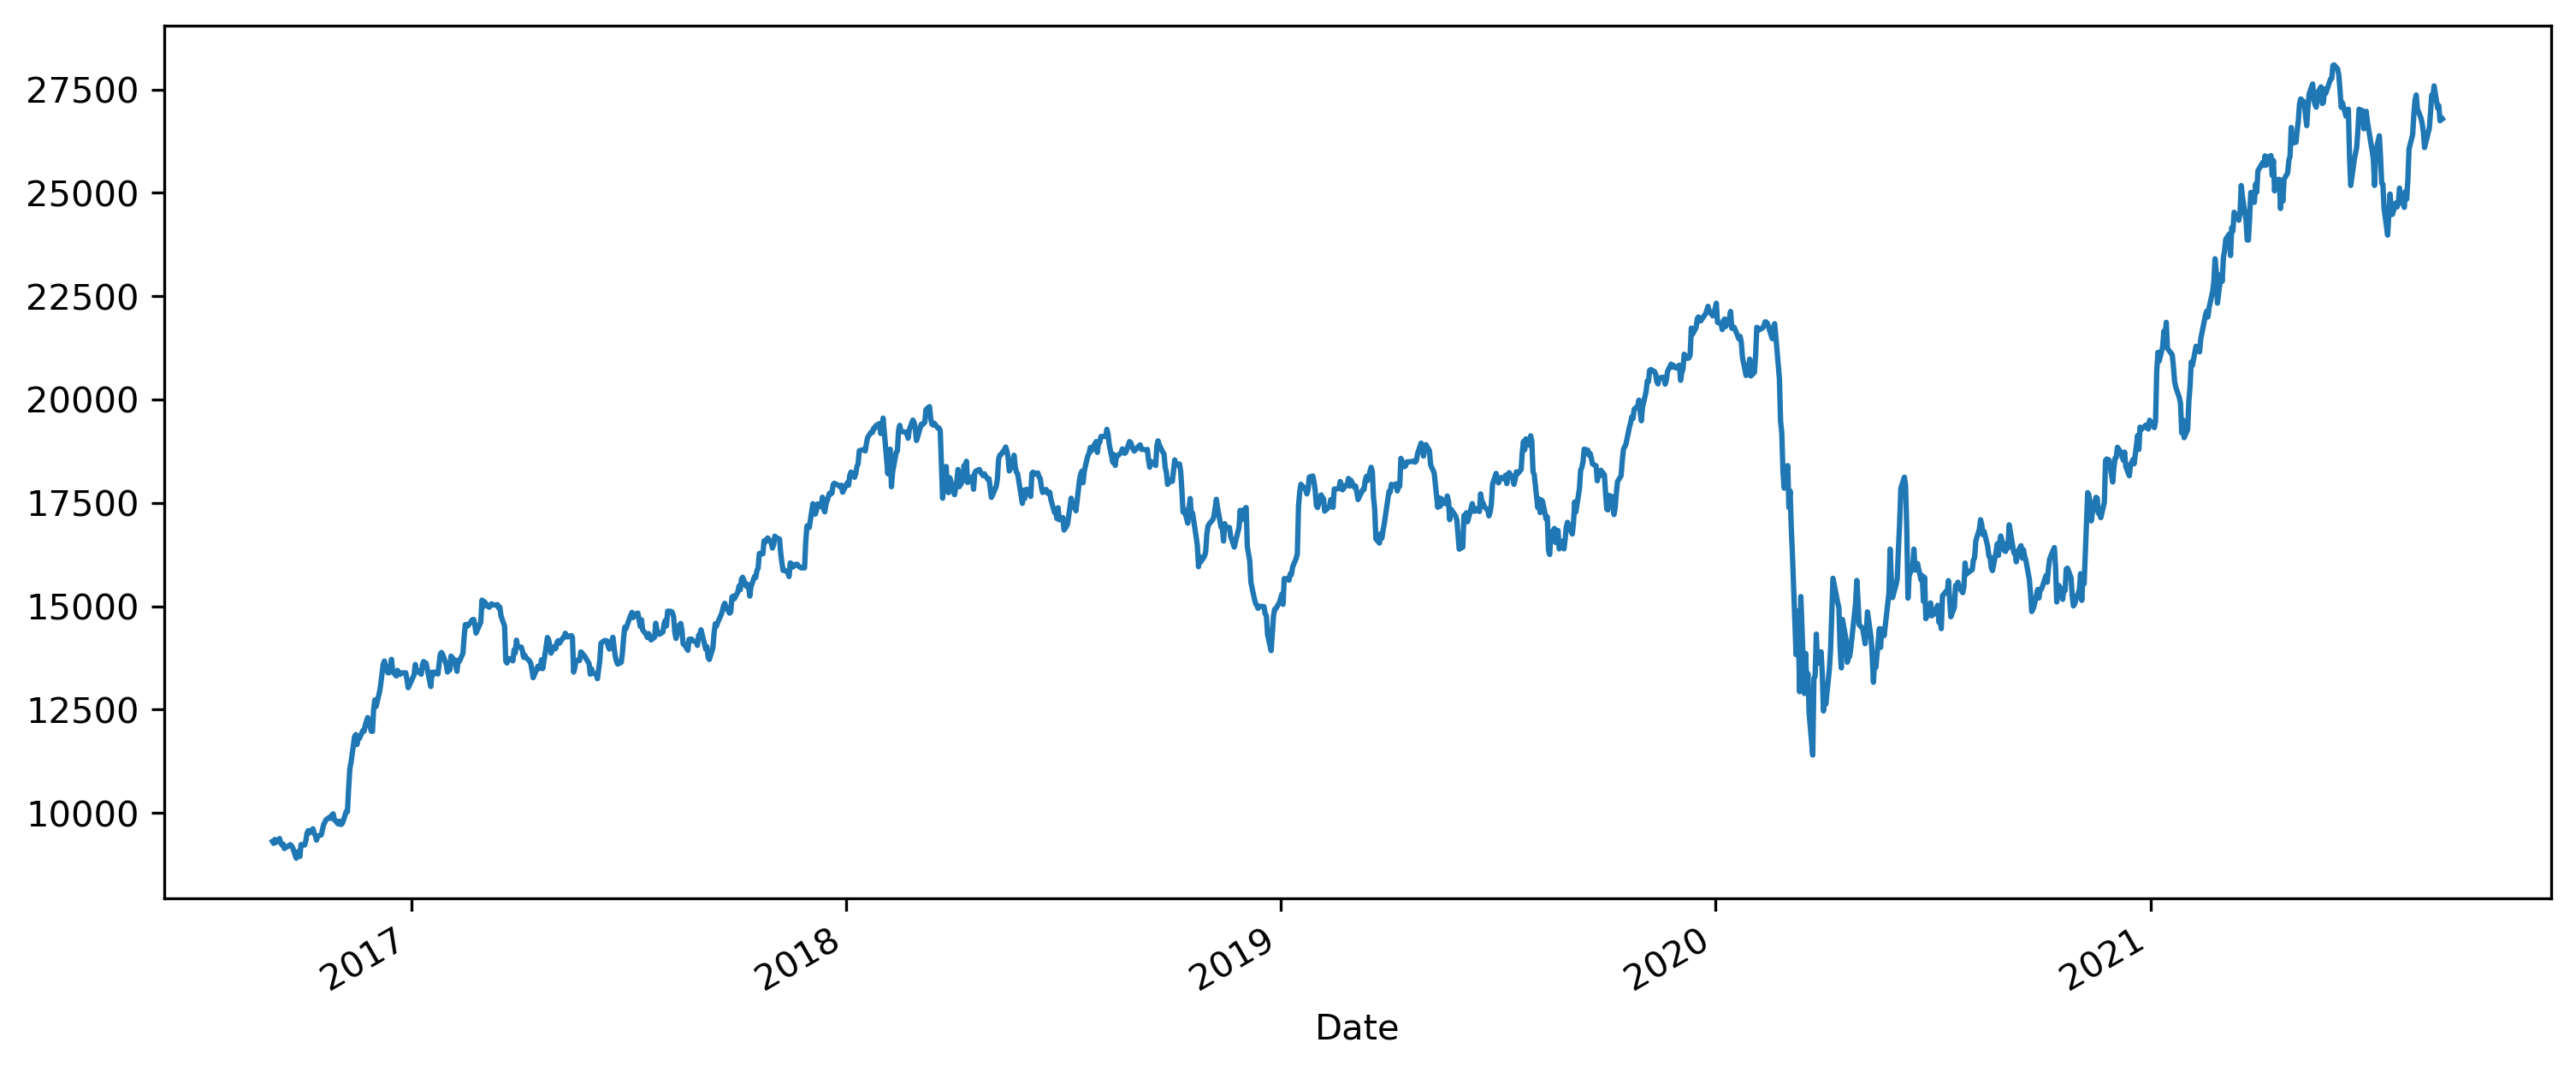

In [11]:
plt.figure(dpi=300,figsize=(12,5))
BAC['Invested Amount'].plot()

**TASK: Find the Annualized Sharpe Ratios for each stock in the portfolio.**

In [12]:
BAC = BAC.dropna()
JPM = JPM.dropna()
CITI = CITI.dropna()
HSBC = HSBC.dropna()
RY = RY.dropna()

In [13]:
#CODE HERE
def find_annualized_sr(df_dict,risk_free_interest=0):
    sr_dict = {}
    for df in df_dict:
      mean_return = df_dict[df]['Daily Returns'].mean()
      std = df_dict[df]['Daily Returns'].std()
      sr = (mean_return - risk_free_interest)/std
      annual_sr = sr*(252**0.5)
      sr_dict[f'{df} Annualized Sharpe Ratio is'] = annual_sr
    return (sr_dict)

In [14]:
# portfolio_dict['BAC']['Daily Returns']
find_annualized_sr(portfolio_dict)

{'BAC Annualized Sharpe Ratio is': 0.7947270097141743,
 'JPM Annualized Sharpe Ratio is': 0.8165068593058444,
 'CITI Annualized Sharpe Ratio is': 0.4791828603521893,
 'HSBC Annualized Sharpe Ratio is': 0.033893608048724454,
 'RY Annualized Sharpe Ratio is': 0.7323180691858788}

------------------
### Part Two:  Volume Analysis 
-------------

**TASK: Create a plot showing the daily volume of stock traded over the time period of 5 years.**

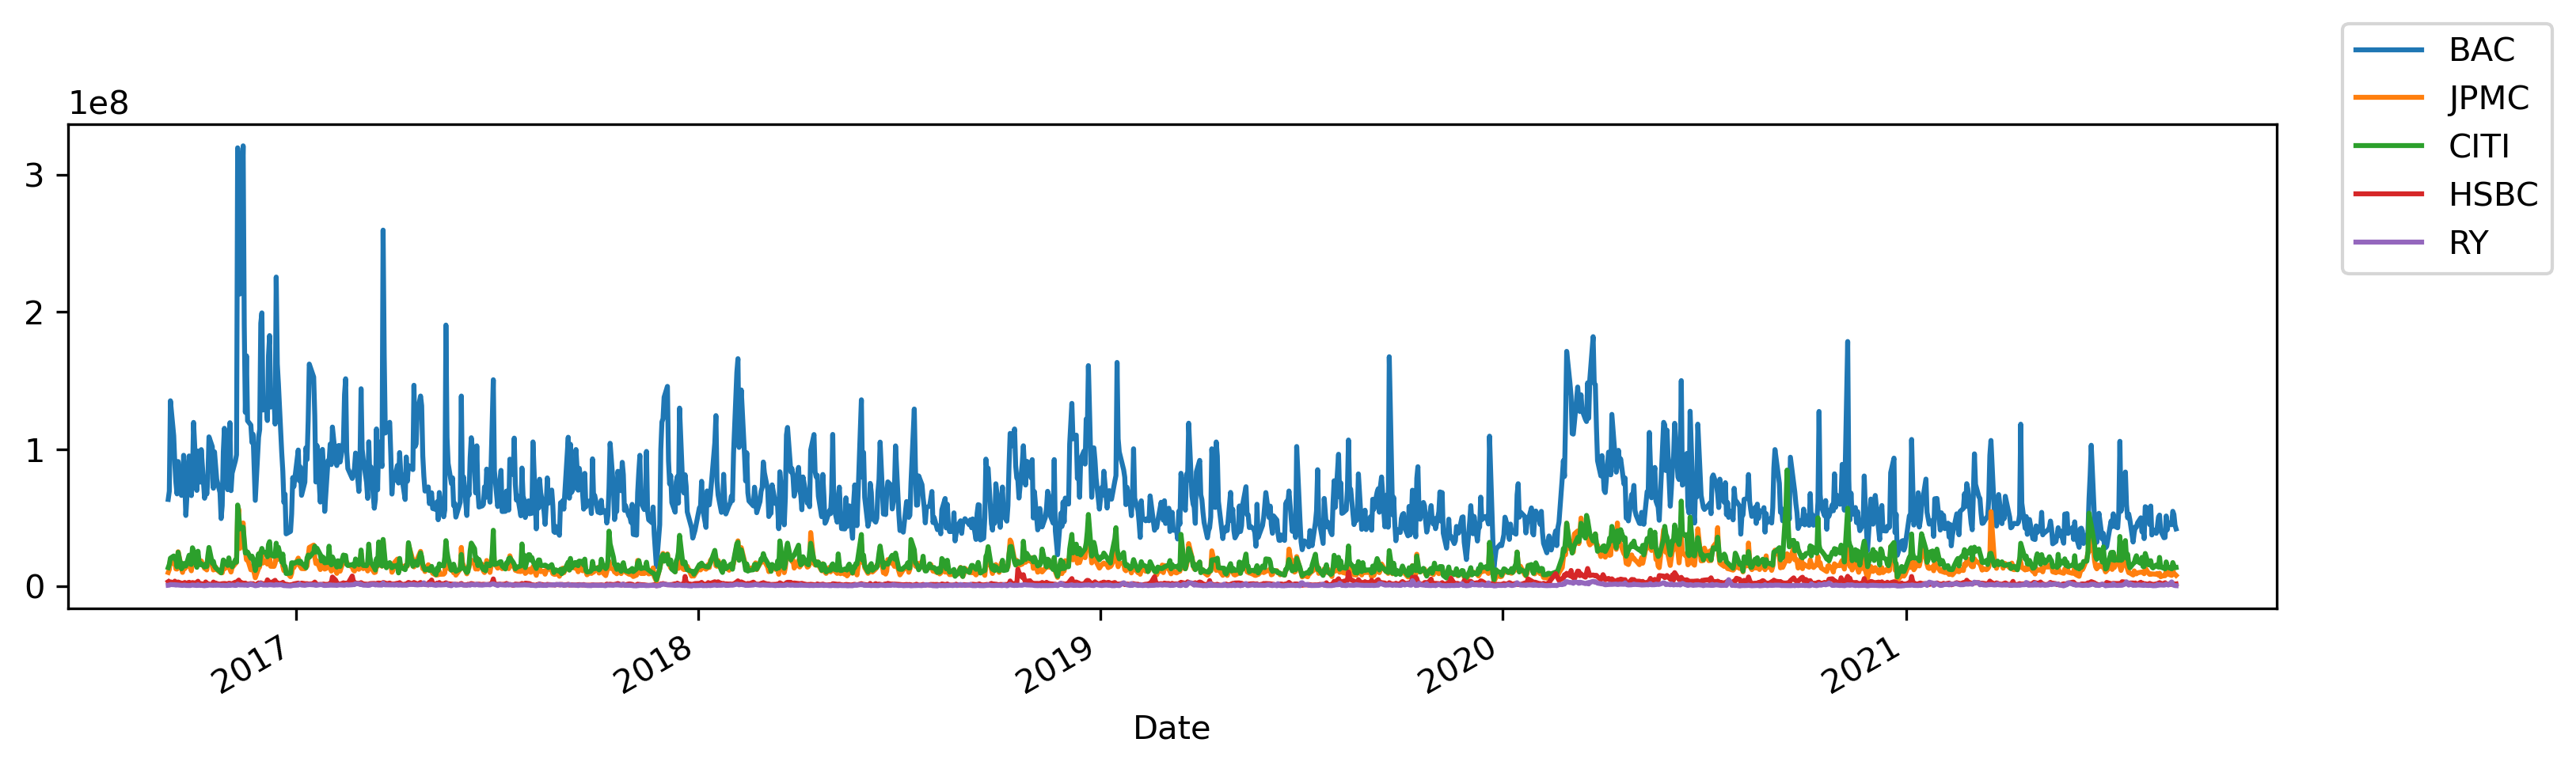

In [15]:
#CODE HERE
plt.figure(dpi=300,figsize=(12,3))
BAC['Volume'].plot(label='BAC')
JPM['Volume'].plot(label='JPMC')
CITI['Volume'].plot(label='CITI')
HSBC['Volume'].plot(label='HSBC')
RY['Volume'].plot(label='RY')
plt.legend(loc=(1.03,0.69))


**TASK: Now create a similar plot as the previous one, but it should reflect the total dollar amount, meaning you will need to take into account the price on each day the volume was traded. Feel free to use Adj Close price as the consensus price for a given day.**

C:\Users\HP\AppData\Local\Temp\ipykernel_16232\1916157710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAC.loc[:, "Total_Trade"] = BAC["Volume"] * BAC["Adj Close"]
C:\Users\HP\AppData\Local\Temp\ipykernel_16232\1916157710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM.loc[:, "Total_Trade"] = JPM["Volume"] * JPM["Adj Close"]
C:\Users\HP\AppData\Local\Temp\ipykernel_16232\1916157710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

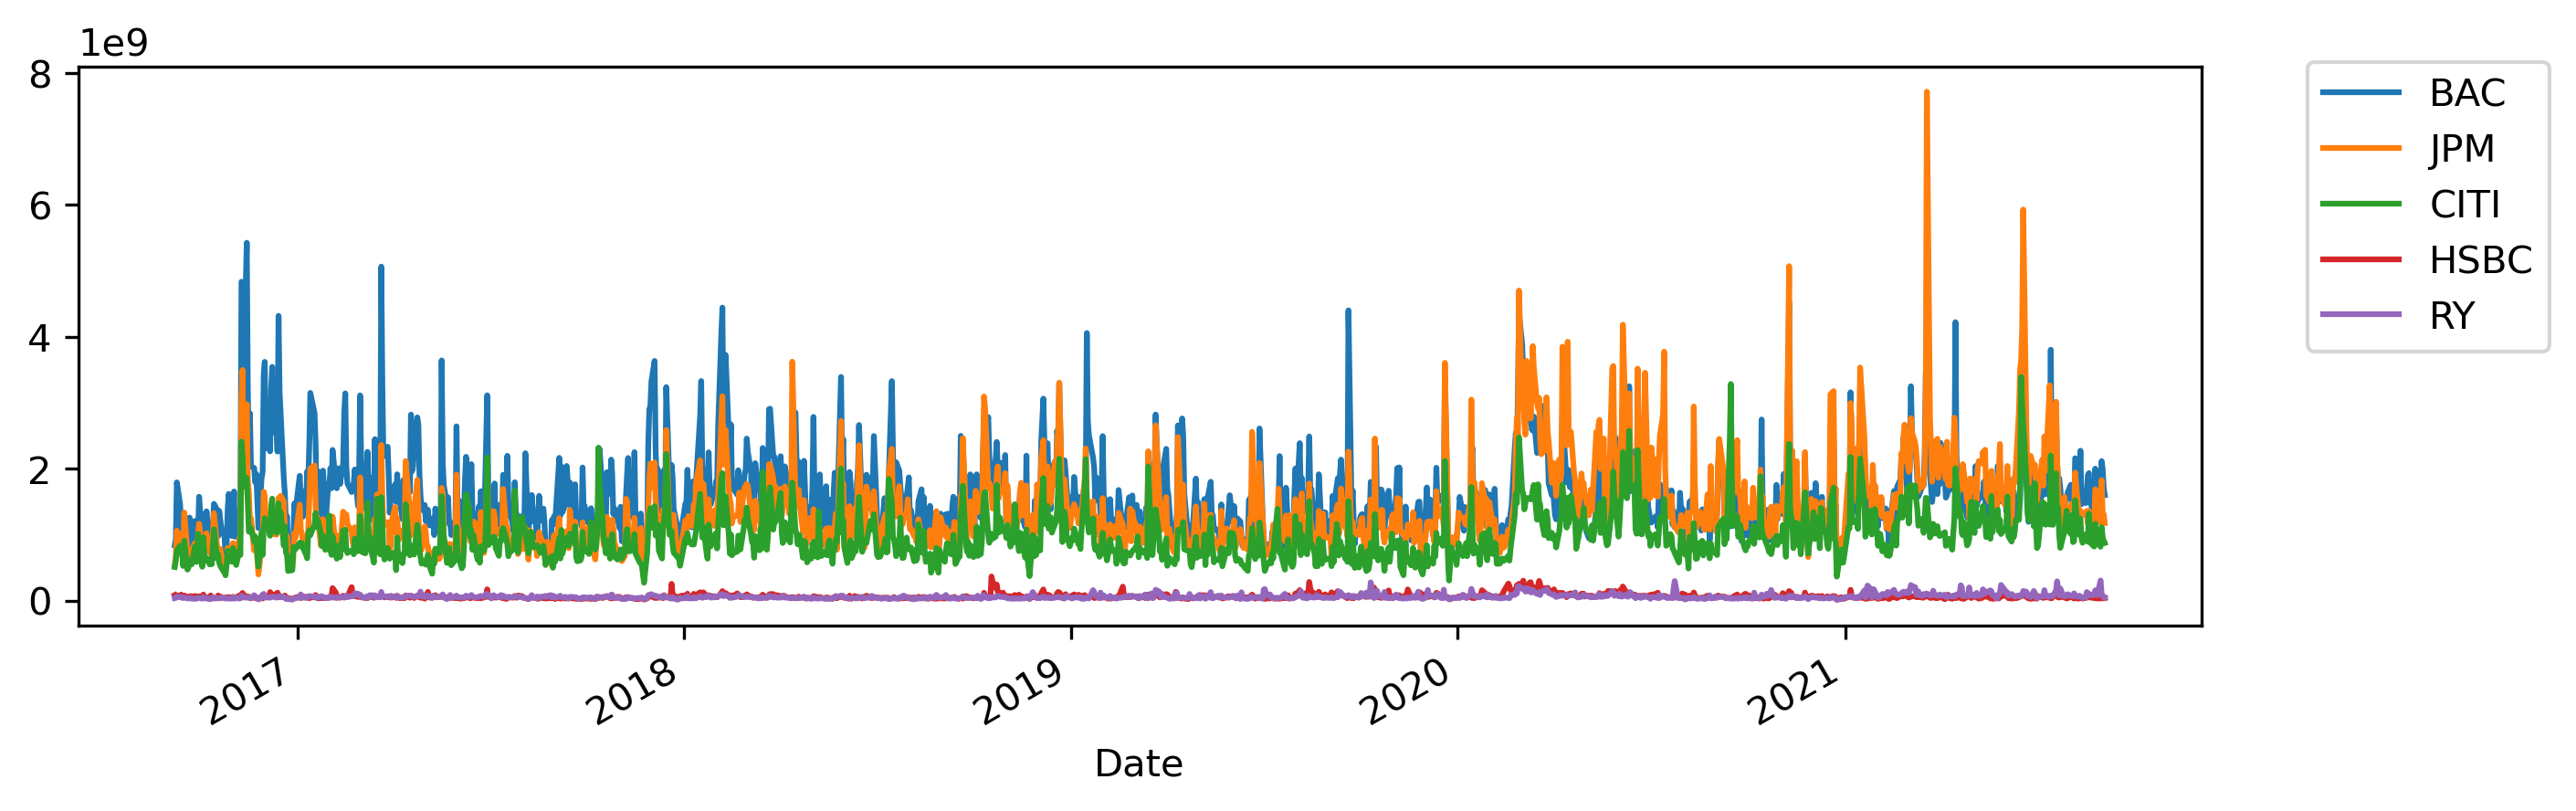

In [16]:
# CODE HERE
BAC.loc[:, "Total_Trade"] = BAC["Volume"] * BAC["Adj Close"]
JPM.loc[:, "Total_Trade"] = JPM["Volume"] * JPM["Adj Close"]
CITI.loc[:, "Total_Trade"] = CITI["Volume"] * CITI["Adj Close"]
HSBC.loc[:, "Total_Trade"] = HSBC["Volume"] * HSBC["Adj Close"]
RY.loc[:, "Total_Trade"] = RY["Volume"] * RY["Adj Close"]

plt.figure(dpi=300, figsize=(10,3))
BAC["Total_Trade"].plot(label='BAC')
JPM["Total_Trade"].plot(label='JPM')
CITI["Total_Trade"].plot(label='CITI')
HSBC["Total_Trade"].plot(label='HSBC')
RY["Total_Trade"].plot(label='RY')
plt.legend(loc=(1.05,.49))


**TASK: Based on your plot above, which stock had the highest dollar value amount traded of their stock on a single day and what date was this? Did anything significant happen aroudn this time period for that company?**

In [17]:
# CODE HERE
def highest_amount_traded(df_list):
    highest_amount_traded = 0
    
    for i in range(len(df_list)):
        if df_list[i]['Total_Trade'].loc[:].max() > highest_amount_traded:
            highest_amount_traded = df_list[i]['Total_Trade'].loc[:].max()
            date_of_trade = df_list[i]['Total_Trade'].loc[:].idxmax()
        
    return highest_amount_traded, date_of_trade

    

In [18]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'CITI':CITI,'HSBC':HSBC,'RY':RY}
portfolio_list = [BAC,JPM,CITI,HSBC,RY]

In [19]:
highest_amount_traded(portfolio_list)

(7715602853.924561, Timestamp('2021-03-19 00:00:00'))

--------
### Part Three: Technical Analysis
----

**TASK: Using only BAC stock, create a plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.**

<Axes: xlabel='Date'>

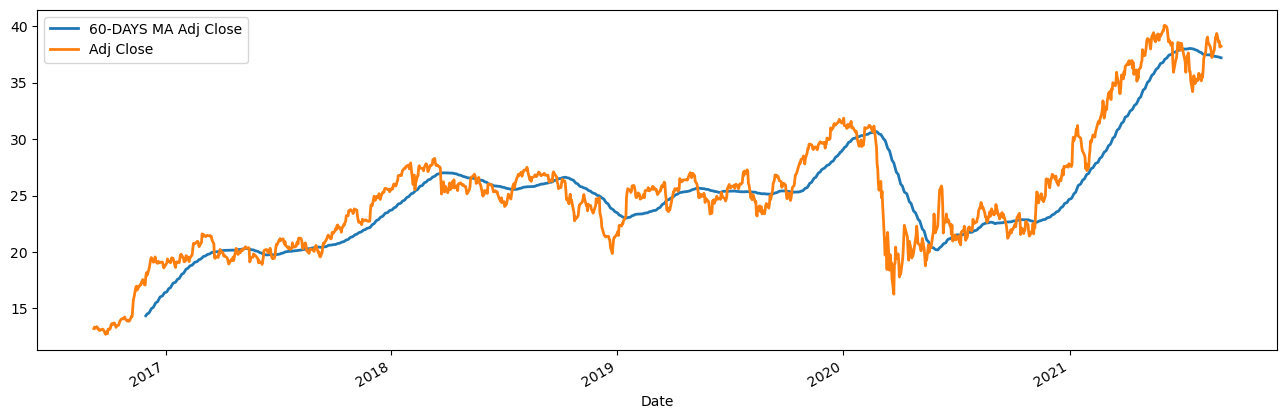

In [20]:
# CODE HERE
BAC.loc[:, '60-DAYS MA Adj Close'] = BAC['Adj Close'].rolling(60).mean()
BAC[['60-DAYS MA Adj Close','Adj Close']].plot(figsize=(16,5), lw=2)

**BONUS TASK : Creating Bollinger Bands.**

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.

 Bollinger Bands consist of an N-period moving average (MA), an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). The chart thus expresses arbitrary choices or assumptions of the user, and is not strictly about the price data alone.

Typical values for N and K are 20 days and 2, respectively.

Source: [https://en.wikipedia.org/wiki/Bollinger_Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

**TASK: Create a plot which has the Adj. Close price and the upper and lower bollinger bands. Use the formula above, with N=20 days for the rolling rate of the moving average and K=2 for the multiplication of the standard deviation.**

<Axes: xlabel='Date'>

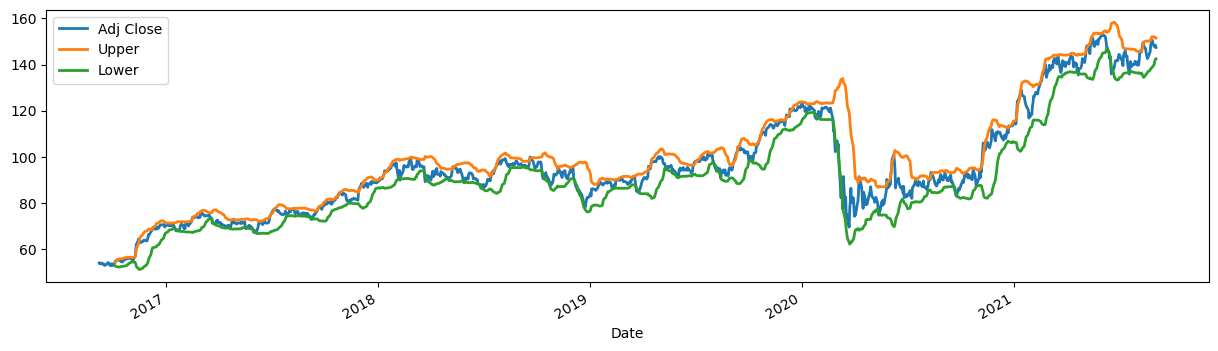

In [21]:
JPM.loc[:,'Close: 20-Day MA'] = JPM['Adj Close'].rolling(20).mean()
JPM.loc[:,'Upper'] = JPM['Close: 20-Day MA'] + 2*JPM['Adj Close'].rolling(20).std()
JPM.loc[:,'Lower'] = JPM['Close: 20-Day MA'] - 2*JPM['Adj Close'].rolling(20).std()
JPM[['Adj Close','Upper','Lower']].plot(figsize=(15,4), lw=2)

# Monte Carlo Simulation for Optimization Search
### (Own Addition)

-----

In [24]:
# Bank of America
BAC = yf.download("BAC",start='2016-09-06',end='2021-09-04')['Adj Close']

# JP Morgan
JPM = yf.download("JPM",start='2016-09-06',end='2021-09-04')['Adj Close']

# CITIGroup
CITI = yf.download("C",start='2016-09-06',end='2021-09-04')['Adj Close']

# HSBC
HSBC = yf.download("HSBC",start='2016-09-06',end='2021-09-04')['Adj Close']

# Royal Bank of Canada
RY = yf.download("RY",start='2016-09-06',end='2021-09-04')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
portfolio = pd.concat([BAC,JPM,CITI,HSBC,RY], axis=1)
portfolio.columns = ['BAC','JPMC','Citi','HSBC','RY']


In [28]:
portfolio

,BAC,JPMC,Citi,HSBC,RY
Date,,,,,
2016-09-06,13.281258,54.334152,37.198227,24.656097,48.223816
2016-09-07,13.213923,54.108566,37.347687,24.347332,47.912502
2016-09-08,13.348588,54.181072,37.591526,24.566038,47.616375
2016-09-09,13.247592,53.697674,37.103836,24.559607,46.955776
2016-09-12,13.382257,54.028004,37.591526,24.443827,46.917812
...,...,...,...,...,...
2021-08-30,38.585114,148.339066,64.208542,22.140488,94.256081
2021-08-31,38.668465,147.886032,64.423561,21.941320,93.132248
2021-09-01,38.149796,147.673386,63.886032,22.132189,92.978165


#### Log Returns

In [29]:
log_returns = np.log(portfolio/portfolio.shift(1))

In [30]:
log_returns

,BAC,JPMC,Citi,HSBC,RY
Date,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN
2016-09-07,-0.005083,-0.004160,0.004010,-0.012602,-0.006477
2016-09-08,0.010140,0.001339,0.006508,0.008943,-0.006200
2016-09-09,-0.007595,-0.008962,-0.013058,-0.000262,-0.013970
2016-09-12,0.010114,0.006133,0.013058,-0.004725,-0.000809
...,...,...,...,...,...
2021-08-30,-0.019727,-0.016137,-0.018250,-0.017463,-0.006613
2021-08-31,0.002158,-0.003059,0.003343,-0.009036,-0.011995
2021-09-01,-0.013504,-0.001439,-0.008379,0.008661,-0.001656


#### Random Weight Generator Function

In [36]:
def gen_weights(n):
    weights = np.random.random(n)
    return weights/np.sum(weights)

#### Portfolio Returns Function

In [32]:
def calc_returns(weights, log_returns):
    return np.sum(log_returns.mean()*weights) * 252
    # Multiplied by 252 to annualize

#### Portfolio Volatility Function

In [31]:
log_returns_cov = log_returns.cov()

In [34]:
def calc_volatility(weights,log_returns_cov):
    annaulized_cov = np.dot(log_returns_cov*252,weights)
    vol = np.dot(weights.transpose(),annaulized_cov)
    return np.sqrt(vol)   

In [38]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(6000):
    weights = gen_weights(n=5)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calc_returns(weights,log_returns))
    mc_portfolio_vol.append(calc_volatility(weights,log_returns_cov))

In [39]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

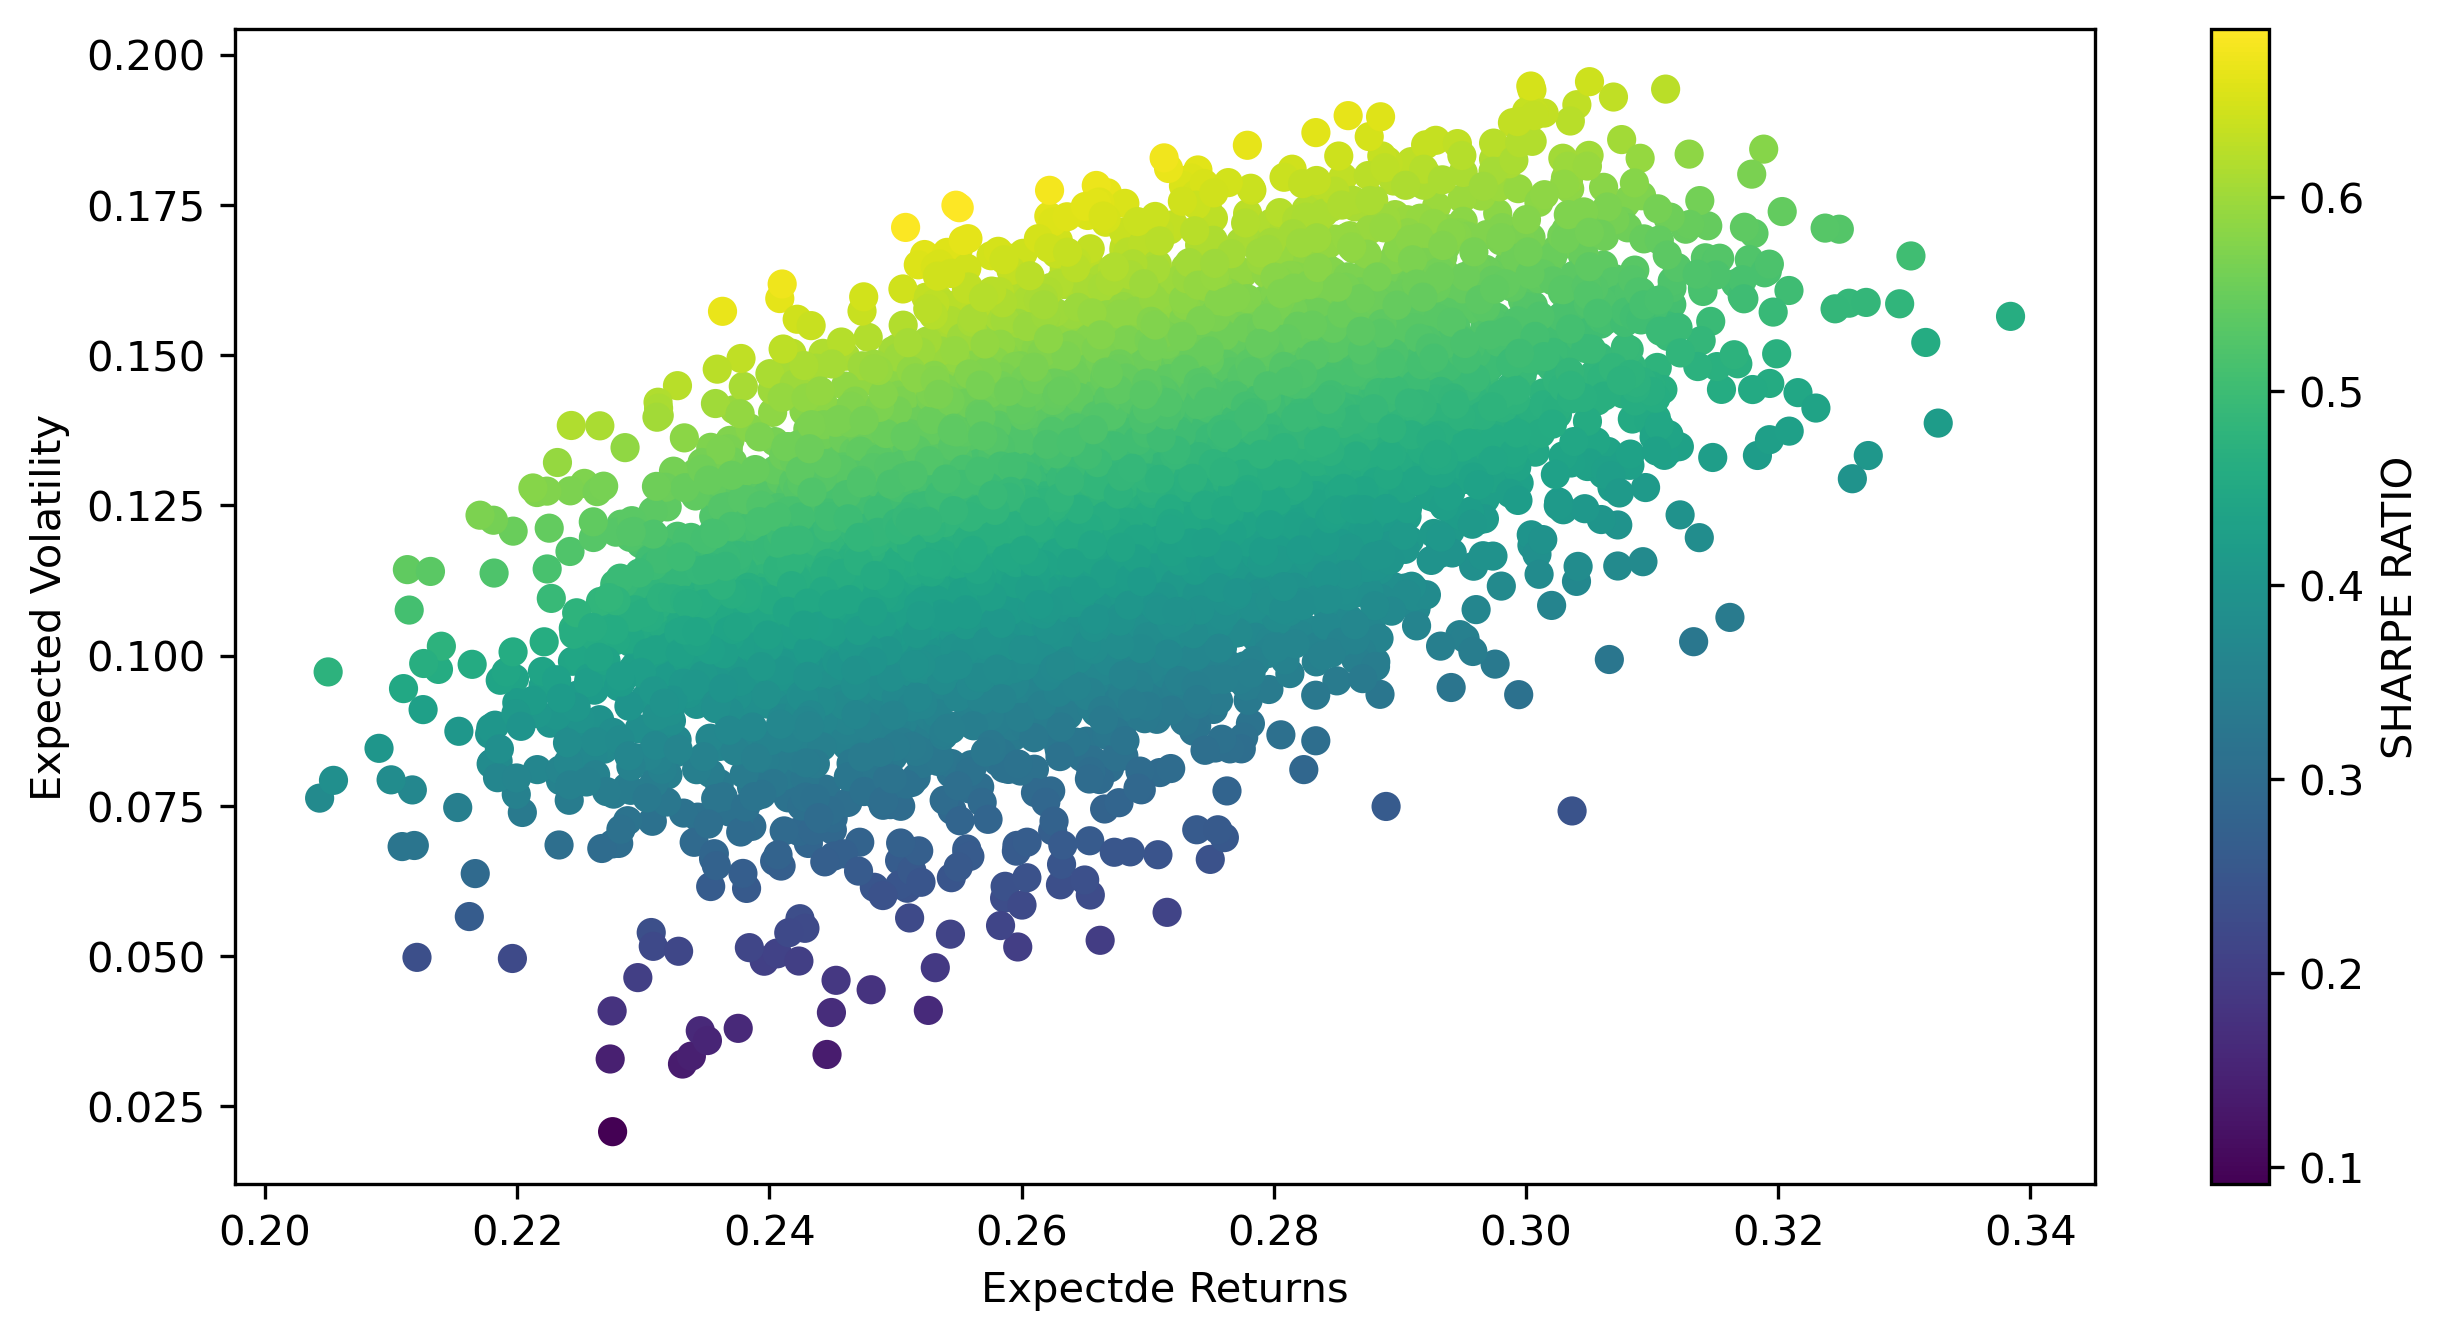

In [40]:
plt.figure(dpi=300,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.xlabel('Expectde Returns')
plt.ylabel('Expected Volatility')
plt.colorbar(label='SHARPE RATIO')

In [41]:
# Weights at which portpolio is optimized
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.12247298, 0.50195044, 0.0030798 , 0.00830095, 0.36419583])